# Green's Functions Using Marchenko Methods

### Marchenko Method Formulas

The Marchenko method reconstructs the **Green's functions** (both upgoing and downgoing) between a virtual source and surface receivers using single-sided reflection data and an estimate of the direct arrival. 

The Marchenko method involves several key equations to estimate Green's functions from seismic reflection data. Here are the formulas corresponding to each section of the code below:

---

### **1. Initial Focusing Functions (Section 4)**

#### a. Downgoing focusing function $f_0^+$ :

$$
f_0^+(\mathbf{x}_f, \mathbf{x}_s, t) = T_d(\mathbf{x}_r, \mathbf{x}_f, -t) \tag{1}
$$

- Where:
  - $T_d$ = Direct arrival wavefield (one-way travel time) from the subsurface focusing point (virtual source) to the surface receivers
  - $T_d(\mathbf{x}_r, \mathbf{x}_f, -t)$ is read as the time-reversed direct arrival at the receiver location $\mathbf{x}_r$ from the virtual source $\mathbf{x}_f$ in the subsurface. Other notations in this note can be read in a similar way.
  - $\mathbf{x}_r$ = Receiver position
  - $\mathbf{x}_f$ = Focal point position
- Implementation: Time reversal of direct arrival (Time-reversed direct arrival)


#### b. Upgoing focusing function $f_0^-$ :

$$
f_0^-(\mathbf{x}_r, \mathbf{x}_f, t) = \Theta(t) \ast \int_S R(\mathbf{x}_r, \mathbf{x}_s, t) \ast f_0^+(\mathbf{x}_f, \mathbf{x}_s, t)  d\mathbf{x}_s   \tag{2}
$$

- Where:
  - $R$ = Reflection response
  - $\Theta$ = Time-window function. It is a muting filter that removes acausal or undesired energy (e.g., above the direct arrival time).
  - $\ast$ = Convolution operator
- Implementation: Convolution of reflection response with $f_0^+$. In frequency domain, this becomes a matrix product.

---

### **2. Iterative Focusing Functions (Section 5)**

For k = 1 to N iterations:
- Downgoing component:
  $$
  m_{k}^{+}(\mathbf{x}_f, \mathbf{x}_s, t) = \Theta(t) \ast \int_S R(\mathbf{x}_r, \mathbf{x}_s, t) \ast f_{k-1}^{-}(\mathbf{x}_r, \mathbf{x}_f, -t) d\mathbf{x}_r
  $$

For the first iteration, for instance,
  $$
  m_{1}^{+}(\mathbf{x}_f, \mathbf{x}_s, t) = \Theta(t) \ast \int_S R(\mathbf{x}_r, \mathbf{x}_s, t) \ast f_{0}^{-}(\mathbf{x}_r, \mathbf{x}_f, -t) d\mathbf{x}_r  \tag{3}
  $$

* Where: $\mathbf{x}_f$: focusing point , $\mathbf{x}_s$: source location (or source side in reflection response), and $\mathbf{x}_r$: receiver location (or receiver side in reflection response)

Implementation: Convolve reflectivity and (time-reversed) fk_minus 

---

- Updating upgoing function:
  $$
  f_{k}^{-}(\mathbf{x}_r, \mathbf{x}_f, t) = f_{0}^{-}(\mathbf{x}_r, \mathbf{x}_f, t) + \Theta(t) \ast \int_S R(\mathbf{x}_r, \mathbf{x}_s, t) \ast m_{k}^{+}(\mathbf{x}_f, \mathbf{x}_s, -t) d\mathbf{x}_s
  $$

    $$
    f_k^-(\mathbf{x}_r, \mathbf{x}_f, t) = \Theta(t) \ast \left[f_0^-(\mathbf{x}_r, \mathbf{x}_f, t) + \int R(\mathbf{x}_r, \mathbf{x}_s, t) \ast m_k^+(\mathbf{x}_f, \mathbf{x}_s, -t) \, d\mathbf{x}_s \right]  \tag{4}
    $$
    
- Downgoing function update:
  $$
  f_{k}^{+}(\mathbf{x}_f, \mathbf{x}_s, t) = f_{0}^{+}(\mathbf{x}_f, \mathbf{x}_s, t) + m_{k}^{+}(\mathbf{x}_f, \mathbf{x}_s, t)
  $$

$$
f_k^+( \mathbf{x}_f, \mathbf{x}_s, t) = f_0^+( \mathbf{x}_f, \mathbf{x}_s, t) + \Theta(t) \ast \int_S R( \mathbf{x}_r, \mathbf{x}_s, t) \ast f_{k-1}^-( \mathbf{x}_r, \mathbf{x}_f, -t)  d\mathbf{x}_r
$$

$$
f_k^+( \mathbf{x}_f, \mathbf{x}_s, t) = f_0^+( \mathbf{x}_f, \mathbf{x}_s, t) + \Theta(t) \ast \int_S R( \mathbf{x}_r, \mathbf{x}_s, t) \ast f_{k-1}^-(\mathbf{x}_r, \mathbf{x}_f, -t)  d\mathbf{x}_r \tag{5}
$$

- Where $k$ = Iteration index

---

### **3. Green's Functions (Section 6)**

#### a. Downgoing Green's function ($G^+$):

$$
G^+( \mathbf{x}_r, \mathbf{x}_f, t) = f_k^+( \mathbf{x}_r, \mathbf{x}_f, -t) - \int_S R( \mathbf{x}_r, \mathbf{x}_s, t) \ast f_k^-( \mathbf{x}_s, \mathbf{x}_f, -t)  d\mathbf{x}_s \tag{6}
$$

#### b. Upgoing Green's function ($G^-$):

$$
G^-( \mathbf{x}_r, \mathbf{x}_f, t) = -f_k^-( \mathbf{x}_r, \mathbf{x}_f, t) + \int_S R( \mathbf{x}_r, \mathbf{x}_s, t) \ast f_k^+( \mathbf{x}_s, \mathbf{x}_f, t)  d\mathbf{x}_s  \tag{7}
$$

Note: In numerical implementations, the convolution is often performed in the frequency domain. which is a simple multiplication

#### c. Total Green's function:

$$
G_{\text{total}}(\mathbf{x}_r, \mathbf{x}_s, t) =  G^+(\mathbf{x}_f, \mathbf{x}_s, t)  +  G^-(\mathbf{x}_r, \mathbf{x}_f, t) \tag{8}
$$

$$
G_{\text{total}} = G^{-} + G^{+}
$$

The upgoing Green's Function can also be extracted by:

$$
G^-(t) = G(t) - G^+(t)
$$

Where:

* $G(t)$: Total Green’s function
* $G^+(t)$: Previously computed downgoing part

This is derived from the assumption that the total Green's function is a sum of its downgoing and upgoing parts.

---

### **4. Key Processing Steps**
For whatever reason, you may choose to design your own taper function using the function below (or a modified function of it) instead of the built-in `tukey` in the SciPy library.

1. **Tapering Window (Tukey)**:

    $$
   w_{\text{tukey}}(i) = \begin{cases} 
   \frac{1}{2} \left[1 + \cos\left(\pi \frac{2i}{\alpha(N-1)} - 1\right)\right] & 0 \leq i \leq \frac{\alpha(N-1)}{2} \\
   1 & \frac{\alpha(N-1)}{2} < i < (N-1) - \frac{\alpha(N-1)}{2} \\
   \frac{1}{2} \left[1 + \cos\left(\pi \frac{2i}{\alpha(N-1)} - \frac{2}{\alpha} + 1\right)\right] & (N-1) - \frac{\alpha(N-1)}{2} \leq i \leq (N-1)
   \end{cases}  \tag{9}
   $$

   more compact

   $$
   w_{\text{tukey}}(i) = \begin{cases} 
   \frac{1}{2} \left[1 + \cos\left(\pi \frac{2i}{\alpha(N-1)} - 1\right)\right] & 0 \leq i \leq \frac{\alpha(N-1)}{2} \\
   1 & \frac{\alpha(N-1)}{2} < i < (N-1)(1-\frac{\alpha}{2}) \\
   \frac{1}{2} \left[1 + \cos\left(\pi \frac{2i}{\alpha(N-1)} - \frac{2}{\alpha} + 1\right)\right] & (N-1)(1-\frac{\alpha}{2}) \leq i \leq (N-1)
   \end{cases}  \tag{10}
   $$
       
<!--     $$
    w_{\alpha}(n) = 
    \begin{cases} 
    \frac{1}{2} \left[1 + \cos\left(\pi \left(\frac{2n}{\alpha(N-1)} - 1\right)\right)\right] & 0 \leq n \leq \frac{\alpha(N-1)}{2} \\
    1 & \frac{\alpha(N-1)}{2} < n < (N-1) - \frac{\alpha(N-1)}{2} \\
    \frac{1}{2} \left[1 + \cos\left(\pi \left(\frac{2n}{\alpha(N-1)} - \frac{2}{\alpha} + 1\right)\right)\right] & (N-1) - \frac{\alpha(N-1)}{2} \leq n \leq N-1
    \end{cases}
    $$ -->

   - Where $\alpha$ = taper fraction (`tp`)
      
#### Comparison with Other Windows
| Window Type | Best For | Spectral Leakage |
|-------------|----------|------------------|
| Tukey       | General purpose with controllable tapering | Moderate |
| Hann        | General purpose | Good |
| Hamming     | Narrowband analysis | Fair |
| Rectangular | Transient detection | Poor |

The Tukey window provides a good compromise between frequency resolution and spectral leakage control, especially when you need to adjust the amount of tapering for your specific application. The Tukey function above is controlled by the `alpha` parameter. The `alpha` parameter controls the transition:
- `alpha=0`: Equivalent to a rectangular window (no tapering)
- `alpha=1`: Equivalent to a Hann window (full cosine taper)
       
2. **Pre-direct Arrival Mute**:

   $$
    G_{\text{final}} = G_{\text{total}} \cdot (1 - \Theta(t))
   $$
   - Removes artifacts before first arrival

---

### **5. Normalization**
$$
G_{\text{norm}} = \frac{G}{\max(|G_{\text{total}}|)}
$$

$$
G_{\text{norm}} = \frac{G}{\max_{t,\mathbf{x}_r}( |G_{\text{total}}|)}
$$

- Ensures consistent amplitude scaling
  
---

### **6. Reference True Green's Function (`true`)**

This is typically computed via direct **forward modeling** (e.g., finite difference, finite element, or Kirchhoff modeling) using the known subsurface model $c(x, z)$ (velocity field):

$$
\left( \frac{1}{c^2(x, z)} \frac{\partial^2}{\partial t^2} - \nabla^2 \right) G(x, z, t) = \delta(x - x_s)\delta(z - z_s)\delta(t)  \tag{11}
$$

Where:

* $c(x, z)$: Velocity model
* $\delta$: Dirac delta function at the source location $(x_s, z_s)$

This equation ensures that `true` serves as the ground truth against which the retrieved Green’s functions are compared.

---

### **Variable Correspondence Table**

| Math Symbol | Code Variable | Description |
|------------|---------------|-------------|
| $R$        | `sg`          | Reflection response |
| $T_d$      | `direct`      | Direct arrival |
| $\Theta$   | `theta`       | Time window function (causality constraint) |
| $f_k^+$    | `fk_plus`     | Downgoing focusing function |
| $f_k^-$    | `fk_minus`    | Upgoing focusing function |
| $G^+$      | `g_plus`      | Downgoing Green's function |
| $G^-$      | `g_minus`     | Upgoing Green's function |
| $w$        | `tap`         | Taper window |
| $\alpha$   | `tp`          | Taper fraction |
| $N$        | `ns`          | Number of receivers |
| $\mathbf{x}_r$          | `-`     | Receiver position vector |
| $\mathbf{x}_f$        | `-`         | Focal point position vector (focusing point) |
| $\mathbf{x}_s$         | `-`          | Source position vector |
| $S$                   | `-`          | Measurement Surface |
| $\ast$        | `-`         | Convolution Operator |
| $k$         | `itr `          | Iteration index |
| $t$                   | `-`          | time |

These equations implement the Marchenko method to retrieve Green's functions from single-sided reflection measurements, enabling redatuming without detailed velocity model information. The iterative scheme progressively removes artifacts caused by internal multiples.

### **Summary**

* The **direct arrival** $T_d$ gives $f_0^+$.
* Using $f_0^+$ and the **reflection response** $R$, we compute $f_0^-$.
* We iteratively update $f_k^+$ and $f_k^-$ using $R$ and a time-reversed convolution process.
* The final Green's functions $G^-$ and $G^+$ are computed from these focusing functions and $R$, from which **total Green's function** is constructed.

In summary, Marchenko methods allow for the reconstruction of $G(t, \mathbf{x}_r, \mathbf{x}_f)$ using only:
- Surface measurements ($\mathbf{x}_s$ and $\mathbf{x}_r$ at the surface)
- An estimate of the direct arrival
- A time window (causality constraint)
- 
  

In [12]:
# Depedencies
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.io import savemat, loadmat
from scipy.signal.windows import tukey
from scipy.fftpack import fft, ifft, fftshift, ifftshift

# The tukey function from scipy.signal.windows generates a Tukey window 
# (also known as a tapered cosine window), which is commonly used 
# in signal processing to reduce spectral leakage when performing Fourier transforms.


In [13]:
###########################
# Set base directory path #
###########################

base_dir = r'C:\Users\Ahmed\Downloads\Marchenko_for_imaging'

dat_dir = os.path.join(base_dir, 'UTILS', 'DATA', 'DAT')
mat_dir = os.path.join(base_dir, 'UTILS', 'DATA', 'MAT')

# Create output directory if it doesn't exist
os.makedirs(mat_dir, exist_ok=True)


## Data Preparation for Marchenko Green's Functions Calculation

In [1]:
# def data_preparation():
#     """
#     This script prepares data for Marchenko method calculations. It only needs to be run once.
    
#     This code is the python version of the MATLAB Code that accompanies the paper:
#     An introduction to Marchenko methods for imaging
#     by Angus Lomas and Andrew Curtis
#     https://doi.org/10.1190/geo2018-0068.1
    
#     The SEG version of this code may be found at:
#     http://software.seg.org/2019/0002
#     """
    
#     ######################
#     # LOAD AND SAVE DATA #
#     ######################
    
#     # Function to load all .dat files with appropriate delimiter handling
#     def load_dat_file(filename):
#         """Load .dat file with automatic delimiter detection"""
#         return np.loadtxt(os.path.join(dat_dir, filename), delimiter=",")
    
#     print("Starting data preparation...")
    
#     ############################################
#     # Load and reshape the base reflectivity (R)
#     print("Processing reflectivity data...")
#     sg = load_dat_file('ICCR_marchenko_R_base.dat')       # load base reflectivity (R)
#     sg = sg.reshape((3001, 188, 94), order='F')           # reshape reflectivity (R)
    
#     # Create the full reflectivity by mirroring across receiver and source dimensions
#     sg = np.concatenate([sg, np.flip(np.flip(sg, axis=1), axis=2)], axis=2)    # Uses a list ([...]) as the input to np.concatenate.
#     # sg = np.concatenate((sg, np.flip(np.flip(sg, axis=1), axis=2)), axis=2)    # You could as well use a tuple ((...)) as the input.
    
#     # Save reflectivity (R) to .mat and .npy format
#     np.save(os.path.join(mat_dir, 'ICCR_marchenko_R.npy'), sg)      # save reflectivity (R)
#     savemat(os.path.join(mat_dir, 'ICCR_marchenko_R.mat'), {'sg': sg})
    
#     ############################################
#     # Load and reshape base eikonal data
#     print("Processing eikonal data...")
#     eik = load_dat_file('ICCR_marchenko_eik_base.dat')
#     eik = eik.reshape((201, 375, 94), order='F')
    
#     # Create the full eikonal by mirroring across receiver and source dimensions
#     eik = np.concatenate((eik, np.flip(np.flip(eik, axis=1), axis=2)), axis=2)
    
#     # Save eikonal to .mat and .npy format
#     np.save(os.path.join(mat_dir, 'ICCR_marchenko_eik.npy'), eik)
#     savemat(os.path.join(mat_dir, 'ICCR_marchenko_eik.mat'), {'eik': eik})
    
#     ############################################
#     # Process other data files
#     print("Processing remaining data files...")
#     dat_files = [
#         ('ICCR_marchenko_GT.dat',    'gt',    'ICCR_marchenko_GT'),
#         ('ICCR_marchenko_TD.dat',    'td',    'ICCR_marchenko_TD'),
#         ('ICCR_marchenko_theta.dat', 'theta', 'ICCR_marchenko_theta'),
#         ('ICCR_marchenko_wav.dat',   'wav',   'ICCR_marchenko_wav'),
#         ('ICCR_marchenko_vel.dat',   'vel',   'ICCR_marchenko_vel')
#     ]
    
#     for filename, var_name, save_name in dat_files:
#         data = load_dat_file(filename)
#         np.save(os.path.join(mat_dir, f'{save_name}.npy'), data)
#         savemat(os.path.join(mat_dir, f'{save_name}.mat'), {var_name: data})
    
#     # Save all data in a single .mat file for convenience
#     print("Creating consolidated data file...")
#     all_data = {
#         'sg' : sg,
#         'eik': eik,
#         'gt' : np.load(os.path.join(mat_dir, 'ICCR_marchenko_GT.npy')),
#         'td' : np.load(os.path.join(mat_dir, 'ICCR_marchenko_TD.npy')),
#         'theta': np.load(os.path.join(mat_dir, 'ICCR_marchenko_theta.npy')),
#         'wav'  : np.load(os.path.join(mat_dir, 'ICCR_marchenko_wav.npy')),
#         'vel'  : np.load(os.path.join(mat_dir, 'ICCR_marchenko_vel.npy'))
#     }
#     savemat(os.path.join(mat_dir, 'ICCR_marchenko_all_data.mat'), all_data)
    
#     print("Data preparation complete!")
#     print(f"Processed 7 data files")
#     print(f"Output saved to: {mat_dir}")

# if __name__ == "__main__":
#     data_preparation()

## Data Dimension

In [15]:
print(np.shape(loadmat(os.path.join(mat_dir, 'ICCR_marchenko_R.mat'))["sg"]))
print(np.shape(loadmat(os.path.join(mat_dir, 'ICCR_marchenko_eik.mat'))["eik"]))

print(np.shape(loadmat(os.path.join(mat_dir, 'ICCR_marchenko_TD.mat'))['td']))
print(np.shape(loadmat(os.path.join(mat_dir, 'ICCR_marchenko_theta.mat'))['theta']))
print(np.shape(loadmat(os.path.join(mat_dir, 'ICCR_marchenko_GT.mat'))['gt']))

(3001, 188, 188)
(201, 375, 188)
(3001, 188)
(3001, 188)
(3001, 188)


## Green's Functions Estimation Using Marchenko Methods

The script below successfully executes and computes the **Marchenko Green's functions** and **focusing functions** from the **input reflectivity**, **direct arrival**, **filter (theta)**, and **ground-truth Green’s functions** (for comparison). 

---

### ✅ Key Outputs

1. **`g_total`** – The full Green's function retrieved via Marchenko method, including both upgoing and downgoing wavefields.
2. **`g_plus` / `g_minus`** – Separated downgoing and upgoing parts of the Green's function.
3. **`fk_plus` / `fk_minus`** – Final focusing functions after iterative Marchenko updates.
4. **`f0_plus` / `f0_minus`** – Initial estimates of the focusing functions using only the direct arrival.
5. **`true`** – Ground-truth solution (presumably from modeling or full wavefield data), for comparison.

---


Loading data...
Initializing focusing functions...
Starting iterative calculation (5 iterations)...
Calculating Green's functions...
Generating plots...


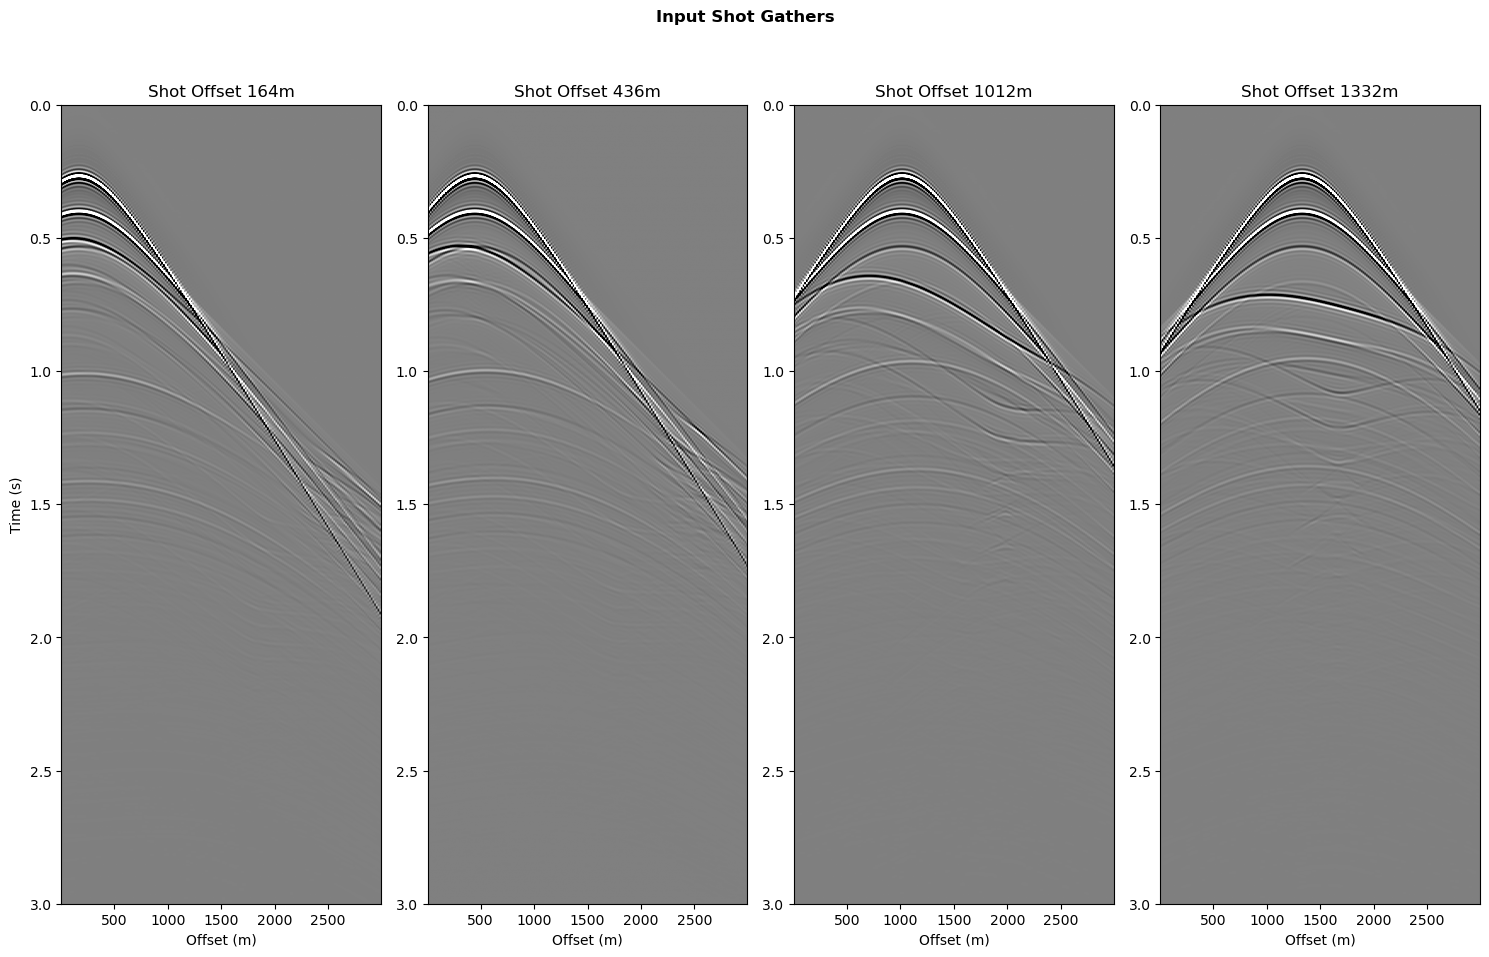

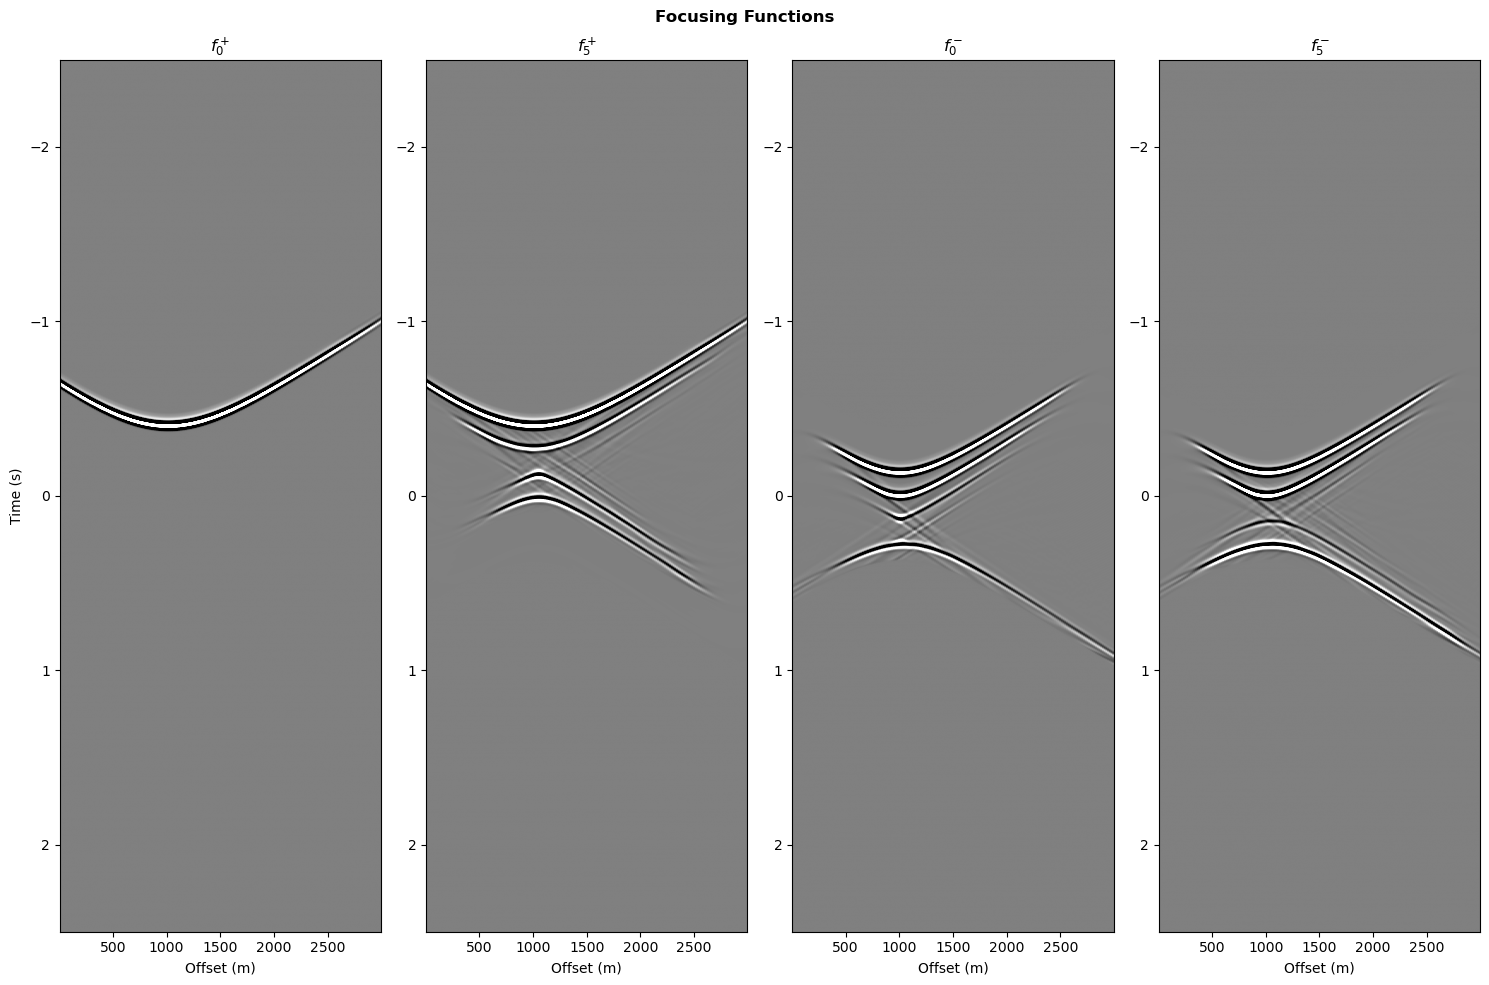

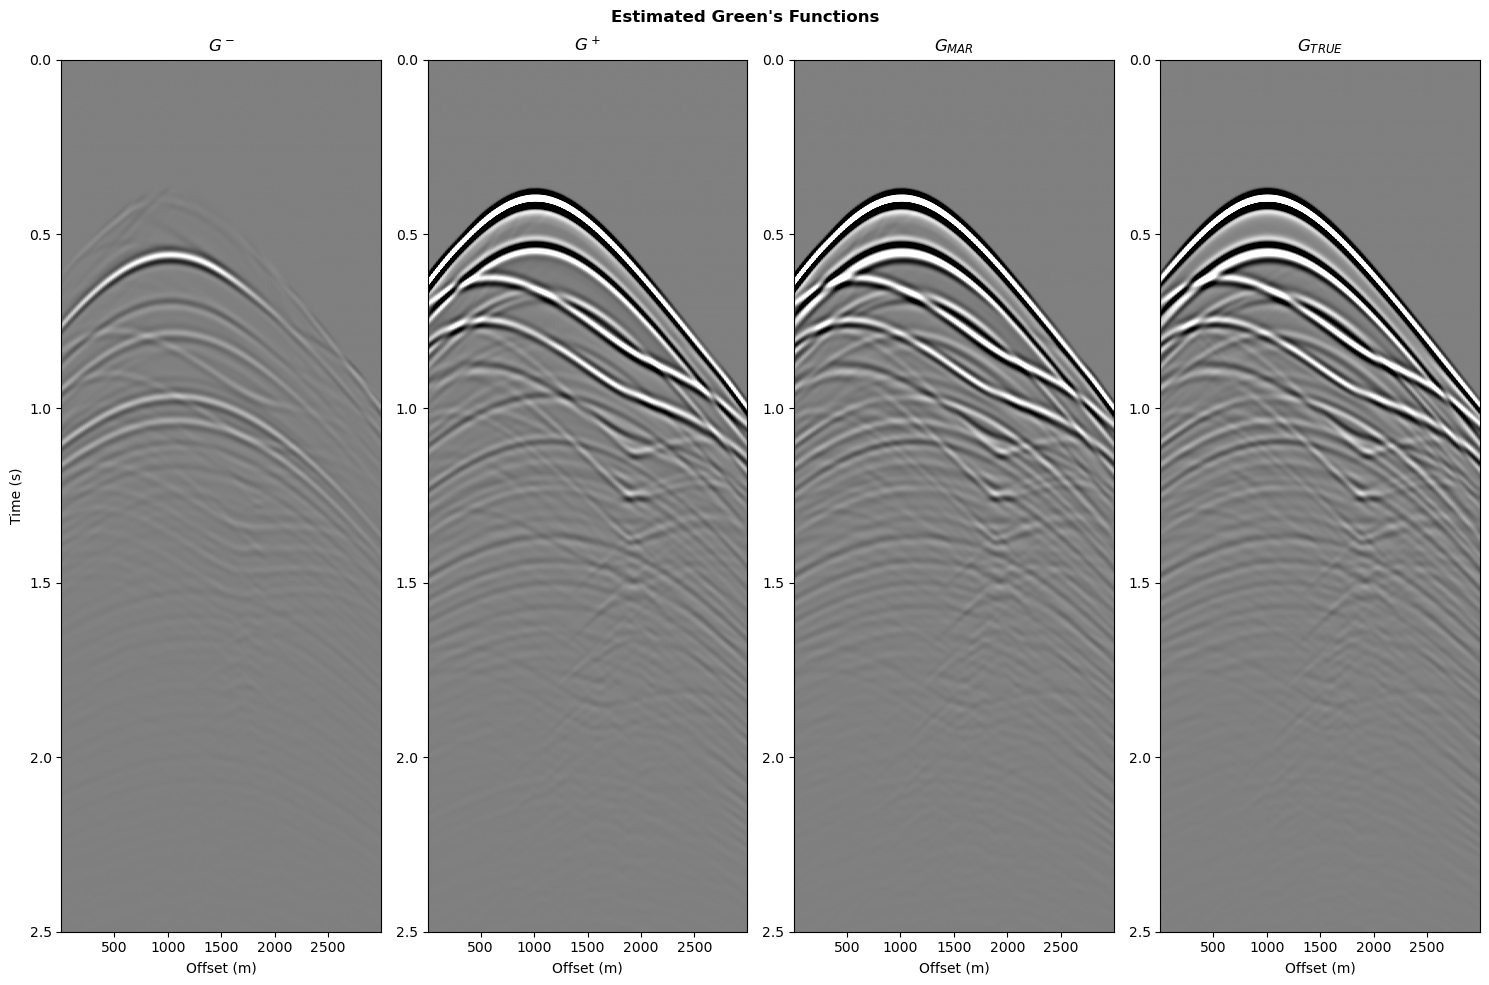

Marchenko processing complete!


In [18]:
def main():
    
    ############################################
    # 1) USER INPUT - SETUP VARIABLES
    nitr    = 5                    # Number of iterations (more iterations = longer run time)
    tp      = 0.2                  # Marchenko taper fraction - defined as a fraction of the number of receivers
    scaling = 1                    # Scaling factor
    dt      = 0.002                # Time sampling interval (seconds)
    dx      = 16                   # Receiver spacing (meters)
    o_min   = 4                    # Initial receiver offset (meters)
    plt_flag = 'y'                 # Plot figures? 'y' or 'n'

    ############################################
    # 2) LOAD DATA
    print("Loading data...")
#     try:
#         # Load numpy arrays
#         sg     = np.load(os.path.join(mat_dir, 'ICCR_marchenko_R.npy'))         # Reflectivity
#         direct = np.load(os.path.join(mat_dir, 'ICCR_marchenko_TD.npy'))        # Direct arrival (T_d)
#         theta  = np.load(os.path.join(mat_dir, 'ICCR_marchenko_theta.npy'))     # Window filter (theta)
#         true   = np.load(os.path.join(mat_dir, 'ICCR_marchenko_GT.npy'))        # True solution (for comparison)
#     except FileNotFoundError as e:
#         print(f"Error loading data: {e}")
#         print("Please run the data preparation script first")
#         return
    
    # Using the MAT files instead of npy files    
    try:
        sg, direct, theta, true = (
            loadmat(os.path.join(mat_dir, fname))[key]
            for key, fname in zip(['sg', 'td', 'theta', 'gt'], [
                'ICCR_marchenko_R.mat',
                'ICCR_marchenko_TD.mat',
                'ICCR_marchenko_theta.mat',
                'ICCR_marchenko_GT.mat'
            ])
        )
    except KeyError as e:
        print(f"Key not found in .mat file: {e}")
    except FileNotFoundError as e:
        print(f"File not found: {e}")
    except Exception as e:
        print(f"An error occurred: {e}")
    
    ############################################
    # 3) AUTOMATICALLY DEFINED VARIABLES
    ns = sg.shape[1]                          # Number of sources/receivers
    ro = np.arange(o_min, o_min + ns*dx, dx)  # Vector of source/receiver offsets
    ts = sg.shape[0]                          # Number of time samples
    max_t = (ts // 2) * dt                    # Maximum recording time (seconds)
    
    # Scale reflection response and transform to frequency domain
    sg_fft     = np.fft.fft(sg * (-2 * dt * dx * scaling), axis=0)
    
    # Create source tapering window (Tukey window) - FIXED DIMENSIONS
    tap_vector = tukey(ns, alpha=tp)           # 1D array for sources. Tukey window of length ns, taper fraction tp
    tap_vector = tap_vector.reshape(1, 1, ns)  # Reshape to [1, 1, ns] for broadcasting

    ############################################
    # 4) FOCUSING FUNCTIONS - INITIAL ESTIMATES
    print("Initializing focusing functions...")
    
    # Time-reversed direct arrival (conjugate)
    f0_plus = np.fft.fft(np.flipud(direct), axis=0)
    
    # Predefine f0_minus array
    f0_minus = np.zeros_like(f0_plus)
    
    # Loop (and stack) over all source positions - FIXED TAPER USAGE
    for nsrc in range(ns):
        # Convolve reflectivity and f0_plus with tapering
        rep_f0 = np.tile(f0_plus[:, nsrc, np.newaxis], (1, ns))
        # Multiply by taper value for this source (scalar multiplication)
        f0_minus += rep_f0 * sg_fft[:, :, nsrc] * tap_vector[0, 0, nsrc]
    
    # Apply window in time domain
    f0_minus_time = np.real(np.fft.ifft(f0_minus, axis=0))             # Take real part of f0_minus
    f0_minus_time = np.fft.ifftshift(f0_minus_time, axes=0) * theta    # Apply ifftshift along axis=0 (time axis) and multiply by theta (filter)
    f0_minus = np.fft.fft(f0_minus_time, axis=0)                       # FFT of f0_minus along axis=0 back to frequency domain
    
    # Transfer back to frequency domain (time reversed)
    fk_minus_tr = np.fft.fft(np.flipud(f0_minus_time), axis=0)        # Flip upside down along axis=0 (time reverse) and convert it back to frequency domain 

    ############################################
    # 5) FOCUSING FUNCTIONS - ITERATIVE CALCULATION
    print(f"Starting iterative calculation ({nitr} iterations)...")
    for itr in range(nitr):
        
        # Predefine arrays for current iteration
        fk_minus = np.zeros_like(fk_minus_tr)
        mk_plus = np.zeros_like(fk_minus_tr)
        
        # Convolve reflectivity with time-reversed fk_minus (fk_minus_tr)
        for nsrc in range(ns):
            rep_fk = np.tile(fk_minus_tr[:, nsrc, np.newaxis], (1, ns))
            # Multiply by taper value for this source
            mk_plus += rep_fk * sg_fft[:, :, nsrc] * tap_vector[0, 0, nsrc]
        
        # Apply window in time domain
        mk_plus_time = np.real(np.fft.ifft(mk_plus, axis=0))
        
        # The ifftshift function is crucial for correct time-domain alignment 
        # after performing an Inverse Fast Fourier Transform (IFFT). It reorders (or shifts) 
        # the elements of a vector or matrix so that the zero-frequency component is moved to the beginning of the array.
        
        mk_plus_time = np.fft.ifftshift(mk_plus_time, axes=0) * theta
        mk_plus = np.fft.fft(np.flipud(mk_plus_time), axis=0)
        
        # Reset for next convolution
        fk_minus = np.zeros_like(mk_plus)
        
        # Convolve reflectivity with mk_plus (time reversed)
        for nsrc in range(ns):
            rep_mk = np.tile(mk_plus[:, nsrc, np.newaxis], (1, ns))
            # Multiply by taper value for this source
            fk_minus += rep_mk * sg_fft[:, :, nsrc] * tap_vector[0, 0, nsrc]
        
        # Apply window and combine
        fk_minus_time = np.real(np.fft.ifft(f0_minus, axis=0))
        fk_minus_conv = np.fft.ifftshift(np.real(np.fft.ifft(fk_minus, axis=0)), axes=0)
        fk_minus_time = fk_minus_time + theta * fk_minus_conv
        
        # Transfer back to frequency domain
        fk_minus_tr = np.fft.fft(np.flipud(fk_minus_time), axis=0)  # time reversed
        fk_minus = np.fft.fft(fk_minus_time, axis=0)
    
    # Calculate total downgoing focusing function
    fk_plus = f0_plus + mk_plus

    ############################################
    # 6) CALCULATE GREEN'S FUNCTIONS
    print("Calculating Green's functions...")
    g_minus = np.zeros_like(fk_plus)
    g_plus  = np.zeros_like(fk_plus)
    
    # Convolve reflectivity with focusing functions
    for nsrc in range(ns):
        # For g_plus 
        rep_fk_tr = np.tile(fk_minus_tr[:, nsrc, np.newaxis], (1, ns))
        g_plus += rep_fk_tr * sg_fft[:, :, nsrc] * tap_vector[0, 0, nsrc]      # convolve reflectivity and (time reversed) fk_minus - fk_minus_tr
        
        # For g_minus
        rep_fk_plus = np.tile(fk_plus[:, nsrc, np.newaxis], (1, ns))
        g_minus += rep_fk_plus * sg_fft[:, :, nsrc] * tap_vector[0, 0, nsrc]    # convolve reflectivity and fk_plus
    
    # Convert to time domain and apply corrections
    g_plus_time = np.flip(np.real(np.fft.ifft(fk_plus, axis=0)), axis=0)
    g_plus_conv = np.fft.ifftshift(np.real(np.fft.ifft(g_plus, axis=0)), axes=0)
    g_plus      = g_plus_time - g_plus_conv        # calculate downgoing green's function
    
    g_minus_time = -np.real(np.fft.ifft(fk_minus, axis=0))
    g_minus_conv = np.fft.ifftshift(np.real(np.fft.ifft(g_minus, axis=0)), axes=0)
    g_minus      = g_minus_time + g_minus_conv     # calculate upgoing green's function
    
    # Calculate total Green's function
    g_total = g_minus + g_plus  # total green's function

    ############################################
    # NORMALIZE SIGNAL AMPLITUDE
    max_val  = np.max(np.abs(g_total))
    true    /= np.max(np.abs(true))
    g_plus  /= max_val
    g_minus /= max_val
    g_total /= max_val

    # Convert focusing functions to time domain and normalize
    f0_plus_time  = np.real(np.fft.ifft(f0_plus, axis=0))
    f0_minus_time = np.real(np.fft.ifft(f0_minus, axis=0))
    fk_plus_time  = np.real(np.fft.ifft(fk_plus, axis=0))
    fk_minus_time = np.real(np.fft.ifft(fk_minus, axis=0))
    
    fk_plus_max   = np.max(np.abs(fk_plus_time))
    f0_plus_time  /= fk_plus_max
    f0_minus_time /= fk_plus_max
    fk_minus_time /= fk_plus_max
    fk_plus_time  /= fk_plus_max

    # APPLY PRE-DIRECT ARRIVAL MUTE
    # Theoretically this step is not required. However, marchenko methods in higher dimensions 
    # are more prone to errors, and these errors manifest themselves as noise
    # — this filter is removing some of this noise.
    
    filter2  = 1 - theta  # Inverted filter
    g_total *= filter2
    g_minus *= filter2
    g_plus  *= filter2
    true    *= filter2

    ############################################
    # 7) PLOT RESULTS
    if plt_flag.lower() == 'y':
        print("Generating plots...")
        # time_axis = np.arange(-max_t, max_t + dt, dt)[:ts]
        time_axis = np.arange(-max_t, max_t + dt, dt)
        time_axis_pos = time_axis[ts//2:]

        ###################################################
        # 7.1) Plot input data (random shot gathers)
        plt.figure(figsize=(15, 10))
        shot_indices = np.sort(np.random.choice(ns, 4, replace=False))
        
        for idx, shot in enumerate(shot_indices):
            plt.subplot(1, 4, idx+1)
            shot_data = np.real(np.fft.ifft(sg_fft[:, shot, :], axis=0))
            plt.imshow(shot_data, 
                       aspect='auto', 
                       extent=[ro.min(), ro.max(), time_axis[-1], time_axis[0]],
                       vmin=-0.002, vmax=0.002, cmap='gray')
            plt.title(f'Shot Offset {ro[shot]}m')
            plt.xlabel('Offset (m)')
            if idx == 0:
                plt.ylabel('Time (s)')
            plt.ylim(max_t,0)
            # plt.xlim(ro[0], ro[-1])
            plt.xlim(ro.min(), ro.max())
            
            plt.gca().set_box_aspect(2.5)  # height / width = 2.5
        
        plt.suptitle('Input Shot Gathers', fontweight='bold')
        plt.savefig("./Shot_Gathers.png", dpi=900, bbox_inches='tight')
        plt.tight_layout()

        ###################################################
        # 7.2) Plot focusing functions
        plt.figure(figsize=(15, 10))
        titles = [r'$f_0^+$', rf'$f_{{{nitr}}}^+$', r'$f_0^-$', rf'$f_{{{nitr}}}^-$']
        data_list = [f0_plus_time, fk_plus_time, f0_minus_time, fk_minus_time]
        
        for idx in range(4):
            plt.subplot(1, 4, idx+1)
            plt.imshow(data_list[idx], aspect='auto',
                      extent=[ro[0], ro[-1], time_axis[-1], time_axis[0]],
                      vmin=-0.1, vmax=0.1, cmap='gray')
            plt.title(titles[idx])
            plt.xlabel('Offset (m)')
            if idx == 0:
                plt.ylabel('Time (s)')
            plt.ylim(max_t-0.5, -max_t+0.5)
            plt.xlim(ro[0], ro[-1])
        
        plt.suptitle('Focusing Functions', fontweight='bold')
        plt.savefig("./Focusing_Functions.png", dpi=900, bbox_inches='tight')
        plt.tight_layout()

        ###################################################
        # 7.3) Plot estimated Green's functions
        plt.figure(figsize=(15, 10))
        titles = [r'$G^-$', r'$G^+$', r'$G_{MAR}$', r'$G_{TRUE}$']
        data_list = [
            g_minus[ts//2:], 
            g_plus[ts//2:], 
            g_total[ts//2:], 
            true[ts//2:]
        ]
        
        for idx in range(4):
            plt.subplot(1, 4, idx+1)
            plt.imshow(data_list[idx], aspect='auto',
                      extent=[ro[0], ro[-1], time_axis_pos[-1], time_axis_pos[0]],
                      vmin=-0.1, vmax=0.1, cmap='gray')
            plt.title(titles[idx])
            plt.xlabel('Offset (m)')
            if idx == 0:
                plt.ylabel('Time (s)')
            plt.ylim(max_t-0.5, 0)
            plt.xlim(ro[0], ro[-1])
        
        plt.suptitle('Estimated Green\'s Functions', fontweight='bold')
        plt.tight_layout()
        plt.savefig("./Greens_Functions.png", dpi=900, bbox_inches='tight')
        plt.show()

    print("Marchenko processing complete!")

if __name__ == "__main__":
    main()

### Key Operations in the Code
1. **Frequency Domain Operations**:
   - Convolutions become multiplications in frequency domain
   - Time reversal becomes complex conjugation
   - **FFT/IFFT** used for domain conversion

2. **Window Functions**:
   - $\Theta(t)$ is a temporal filter. It act as a `causal time gate` that preserves only physically meaningful arrivals
   - Tukey window tapers source contributions

3. **Iterative Scheme**:
   - Alternates between calculating downgoing (`mk_plus`) and upgoing (`fk_minus`) components
   - Each iteration refines the estimate
     
4. **Green's Function Construction**:
   - Combines focusing functions with reflectivity
   - Includes both primaries and multiples


## Key References

---

1. **Lomas, Angus**, and **Andrew Curtis**. "An introduction to Marchenko methods for imaging." *Geophysics* 84, no. 2 (2019): F35-F45. Download the paper [here](https://pubs.geoscienceworld.org/seg/geophysics/article/84/2/F35/569232/An-introduction-to-Marchenko-methods-for-imagingAn)